# Email Classifier (Logistic Regression)
## ABB #1 - Session 2

Code authored by: Shaw Talebi

### imports

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import numpy as np

### load data

In [2]:
df = pd.read_csv("data/transformed_data.csv")
df.head()

,body_length,contains_lol,contains_omg,contains_attached,contains_attachment,contains_order_confirmation,contains_payment_summary,sender_has_common_domain,is_personal
0,1830,False,False,False,False,False,False,False,True
1,1522,False,False,False,False,False,False,True,True
2,1838,False,False,False,False,False,False,False,True
3,251,False,False,False,True,False,False,False,True
4,3170,False,False,False,False,False,False,False,True


### data prep

In [3]:
# split data by predictors and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### train model

In [5]:
# train logistic regression model
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(X_train, y_train)

### eval model

In [6]:
# compute accuracy
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

print(train_acc)
print(test_acc)

0.8458333333333333
0.8166666666666667


In [7]:
# predict AUC
train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

print(train_auc)
print(test_auc)

0.9123550246544899
0.8598442714126807


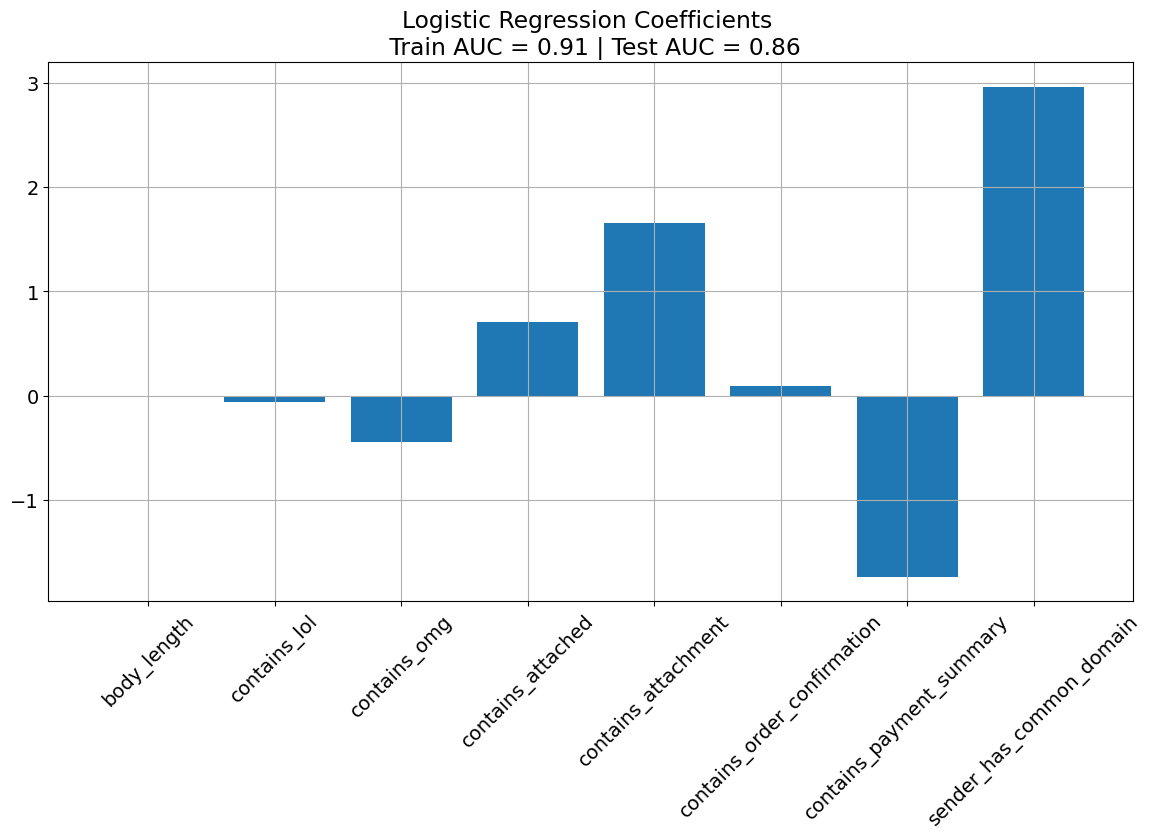

In [8]:
# plot model coefficents
num_vars = len(X.columns)

plt.figure(figsize=(14, 7))
plt.rcParams.update({'font.size': 14})

plt.bar(np.linspace(1,num_vars,num_vars), clf.coef_[0])
plt.grid()
plt.xticks(np.linspace(1,num_vars,num_vars), X.columns, rotation=45)
plt.title(f"Logistic Regression Coefficients \n Train AUC = {round(train_auc,2)} | Test AUC = {round(test_auc,2)}")
plt.show()

In [9]:
# cols_to_keep = [2,3,4,6,7]